<a href="https://colab.research.google.com/github/weiyuchen1213/CE888/blob/master/spine_df_of_Decision_Making_As_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [0]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [0]:
# load Dataset_spine
spine_df = pd.read_csv("https://raw.githubusercontent.com/weiyuchen1213/CE888/master/Assignment/Dataset_spine.csv", delimiter = ",")

spine_df.head(5)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN,NaN,NaN,NaN,Abnormal,210.0,0.677419
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN,NaN,NaN,NaN,Normal,100.0,0.322581
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...,NaN,NaN,NaN,NaN,310.0,NaN
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


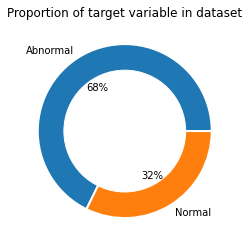

In [0]:
plt.pie(spine_df["Class_att"].value_counts().values,
        labels=["Abnormal","Normal"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

In [0]:
spine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  2 non-null      object 
 18  Unnamed: 18  3 non-null      float64
 19  Unnamed:

In [0]:
# Unnamed: 13 to 19 columns seem unnecessary and is not important for our statistical model. It only contains the technical names of columns. So we may store only useful rows and then delete the column.
# drop 13 to 19 useless columns.
cols = [13,14,15,16,17,18,19]
spine_df.drop(spine_df.columns[cols],axis=1,inplace=True)

In [0]:
#Convert two class names to 0 and 1
spine_df.Class_att = [1 if each == "Abnormal" else 0 for each in spine_df.Class_att]

# Check missing value

In [0]:
# dealing with missing value

#p_pulsar
total = spine_df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['Total'])
missing_data.head()

,Total
Class_att,0
Col12,0
Col11,0
Col10,0
Col9,0


# Normalization

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
for col in spine_df.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    spine_df[col] = mms.fit_transform(spine_df[[col]])
spine_df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952,0.471832,0.481023,0.490527,0.500764,0.502473,0.499235,0.677419
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428,0.287048,0.290724,0.276710,0.295518,0.289298,0.279926,0.468220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474,0.222123,0.202827,0.275105,0.256427,0.260246,0.272710,0.000000
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133,0.474855,0.500730,0.480266,0.502859,0.488992,0.480109,1.000000
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847,0.704722,0.737865,0.720461,0.749831,0.752264,0.722457,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Decision Tree

In [0]:
spine_X = spine_df.drop('Class_att', axis = 1)
spine_Y = np.array(spine_df['Class_att'])

from sklearn.preprocessing import LabelEncoder
for col in spine_X .select_dtypes(include='object').columns:
    le = LabelEncoder()
    spine_X [col] = le.fit_transform(spine_X [col].astype('str'))
spine_X =spine_X .values


print("spine:",spine_X)
print(spine_X.shape)
print(spine_Y.shape)


Pulsar: [[0.35568788 0.51989984 0.22917997 ... 0.84511485 0.15686136 0.9777973 ]
 [0.12450104 0.2967831  0.09857833 ... 0.99630049 0.2308778  0.24381182]
 [0.41166648 0.51393229 0.32299466 ... 0.98344208 0.14802577 0.32716636]
 ...
 [0.34043781 0.52244298 0.28789745 ... 0.19050343 0.91936458 0.30555027]
 [0.18425678 0.27235174 0.24684569 ... 0.27870135 0.97149127 0.71548189]
 [0.07420202 0.20770855 0.20261992 ... 0.68420445 0.87720937 0.89992045]]
(310, 12)
(310,)


In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [0]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(spine_X, spine_Y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


# DecisionTree

In [0]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold

cv_score_DT =[]
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
i=1
for train_index,test_index in skf.split(spine_X, spine_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = spine_X[train_index],spine_X[test_index]
    ytr,yvl = spine_Y[train_index],spine_Y[test_index]
    model_DT = tree.DecisionTreeClassifier(max_depth=10, criterion = "entropy")
    model_DT.fit(xtr,ytr)
    score_DT = roc_auc_score(yvl,model_DT.predict(xvl))
    print('ROC AUC score:',score_DT)
    cv_score_DT.append(score_DT)
    print('Confusion matrix \n',confusion_matrix(yvl,model_DT.predict(xvl)))
    i+=1

1 of KFold 10
ROC AUC score: 0.4214285714285714
Confusion matrix 
 [[ 7  3]
 [18  3]]
2 of KFold 10
ROC AUC score: 0.4642857142857143
Confusion matrix 
 [[ 5  5]
 [12  9]]
3 of KFold 10
ROC AUC score: 0.6357142857142857
Confusion matrix 
 [[ 7  3]
 [ 9 12]]
4 of KFold 10
ROC AUC score: 0.7761904761904761
Confusion matrix 
 [[ 6  4]
 [ 1 20]]
5 of KFold 10
ROC AUC score: 0.8261904761904761
Confusion matrix 
 [[ 7  3]
 [ 1 20]]
6 of KFold 10
ROC AUC score: 0.7523809523809524
Confusion matrix 
 [[ 6  4]
 [ 2 19]]
7 of KFold 10
ROC AUC score: 0.9
Confusion matrix 
 [[ 8  2]
 [ 0 21]]
8 of KFold 10
ROC AUC score: 0.85
Confusion matrix 
 [[ 7  3]
 [ 0 21]]
9 of KFold 10
ROC AUC score: 0.7761904761904761
Confusion matrix 
 [[ 6  4]
 [ 1 20]]
10 of KFold 10
ROC AUC score: 0.8
Confusion matrix 
 [[ 6  4]
 [ 0 21]]


In [0]:
xtr

array([[0.35568788, 0.51989984, 0.22917997, ..., 0.84511485, 0.15686136,
        0.9777973 ],
       [0.12450104, 0.2967831 , 0.09857833, ..., 0.99630049, 0.2308778 ,
        0.24381182],
       [0.41166648, 0.51393229, 0.32299466, ..., 0.98344208, 0.14802577,
        0.32716636],
       ...,
       [0.18736897, 0.45214369, 0.17696188, ..., 0.5488403 , 0.5424649 ,
        0.66854256],
       [0.38924455, 0.49034084, 0.1586459 , ..., 0.22487151, 0.48422336,
        0.9865991 ],
       [0.5473966 , 0.65102952, 0.39600499, ..., 0.97921042, 0.46211169,
        0.77512301]])

# RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
cv_score_RF =[]

i=1
for train_index,test_index in skf.split(spine_X, spine_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = spine_X[train_index],spine_X[test_index]
    ytr,yvl = spine_Y[train_index],spine_Y[test_index]
    model_RF = RandomForestClassifier(n_estimators=100)
    model_RF.fit(xtr,ytr)
    score_RF = roc_auc_score(yvl,model_RF.predict(xvl))
    print('ROC AUC score:',score_RF)
    cv_score_RF.append(score_RF)
    print('Confusion matrix \n',confusion_matrix(yvl,model_RF.predict(xvl)))
    i+=1

1 of KFold 10
ROC AUC score: 0.6142857142857143
Confusion matrix 
 [[ 8  2]
 [12  9]]
2 of KFold 10
ROC AUC score: 0.6357142857142857
Confusion matrix 
 [[ 7  3]
 [ 9 12]]
3 of KFold 10
ROC AUC score: 0.661904761904762
Confusion matrix 
 [[ 8  2]
 [10 11]]
4 of KFold 10
ROC AUC score: 0.6761904761904762
Confusion matrix 
 [[ 4  6]
 [ 1 20]]
5 of KFold 10
ROC AUC score: 0.85
Confusion matrix 
 [[ 7  3]
 [ 0 21]]
6 of KFold 10
ROC AUC score: 0.7261904761904762
Confusion matrix 
 [[ 5  5]
 [ 1 20]]
7 of KFold 10
ROC AUC score: 0.85
Confusion matrix 
 [[ 7  3]
 [ 0 21]]
8 of KFold 10
ROC AUC score: 0.9500000000000001
Confusion matrix 
 [[ 9  1]
 [ 0 21]]
9 of KFold 10
ROC AUC score: 0.75
Confusion matrix 
 [[ 5  5]
 [ 0 21]]
10 of KFold 10
ROC AUC score: 0.8
Confusion matrix 
 [[ 6  4]
 [ 0 21]]


# Elbow Method

1 of KFold 10


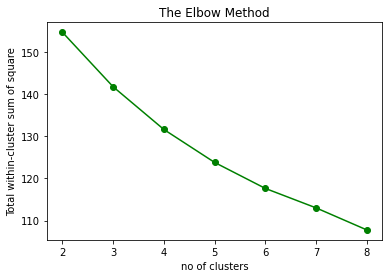

2 of KFold 10


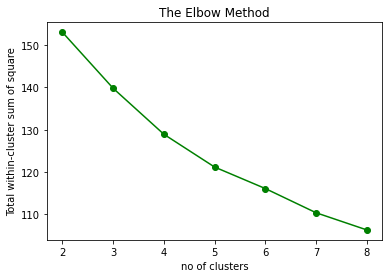

3 of KFold 10


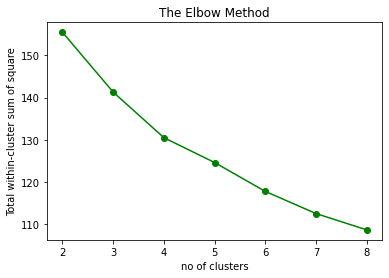

4 of KFold 10


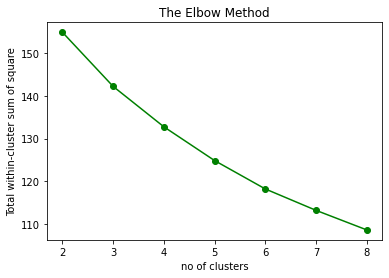

5 of KFold 10


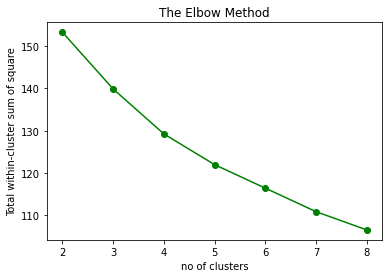

6 of KFold 10


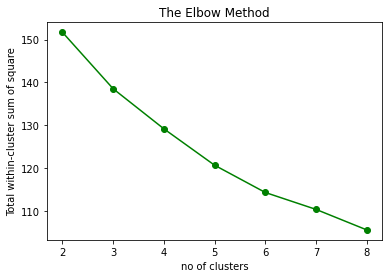

7 of KFold 10


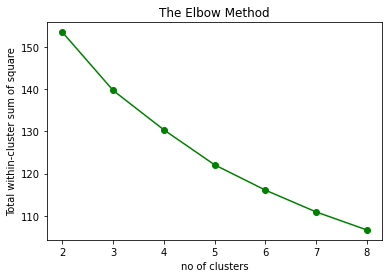

8 of KFold 10


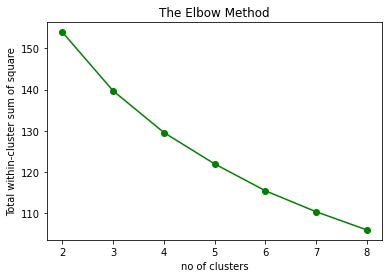

9 of KFold 10


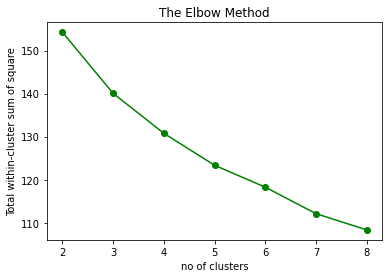

10 of KFold 10


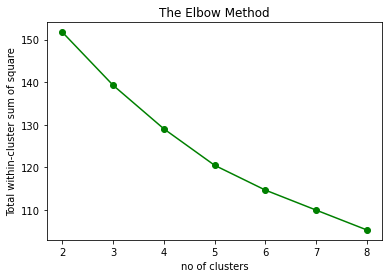

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.cluster import KMeans
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)

i=1
for train_index,test_index in skf.split(spine_X, spine_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = spine_X[train_index],spine_X[test_index]
    ytr,yvl = spine_Y[train_index],spine_Y[test_index]

    score = []
    for cluster in range(2,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(xtr)
        score.append(kmeans.inertia_)

    plt.plot(range(2,9), score, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1

# Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.11061634738971664
For n_clusters = 3 The average silhouette_score is : 0.10135979322300376
For n_clusters = 4 The average silhouette_score is : 0.10387513825958664
For n_clusters = 5 The average silhouette_score is : 0.11597380876692776
For n_clusters = 6 The average silhouette_score is : 0.11013764356305017
For n_clusters = 7 The average silhouette_score is : 0.10577538467371161
For n_clusters = 8 The average silhouette_score is : 0.11244573688640382


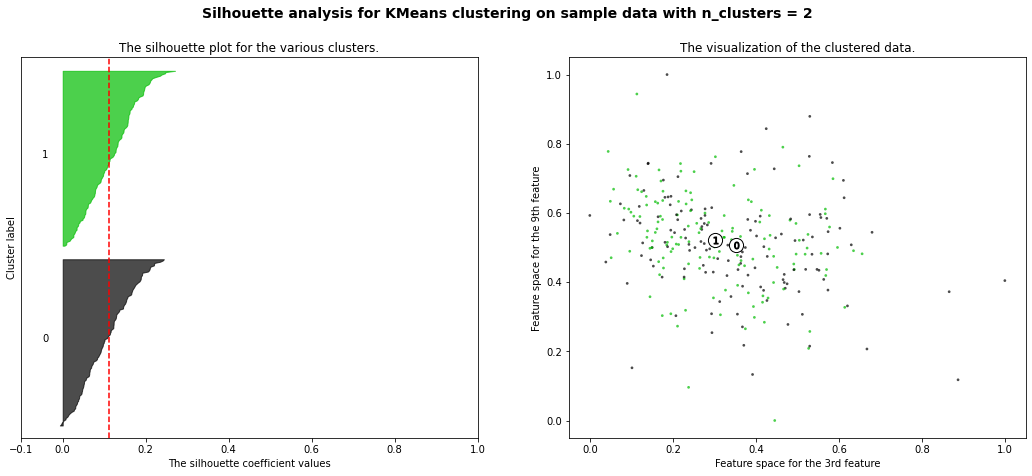

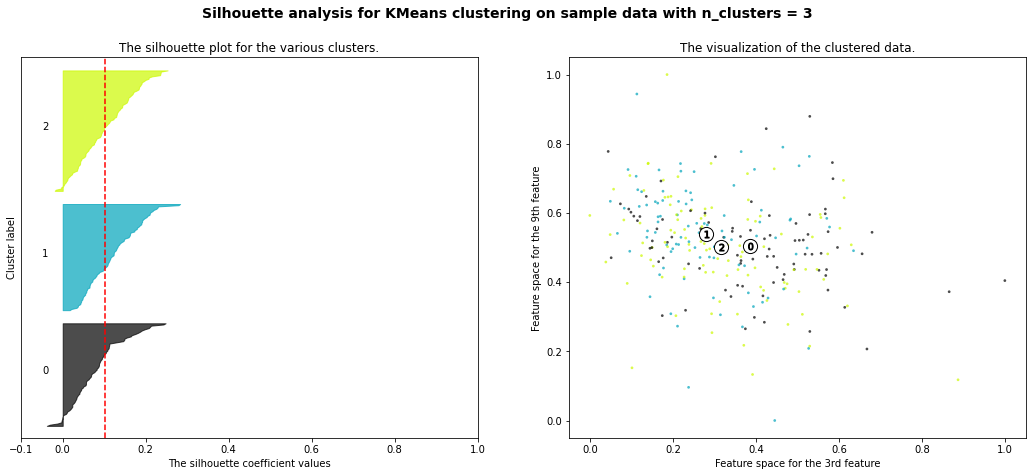

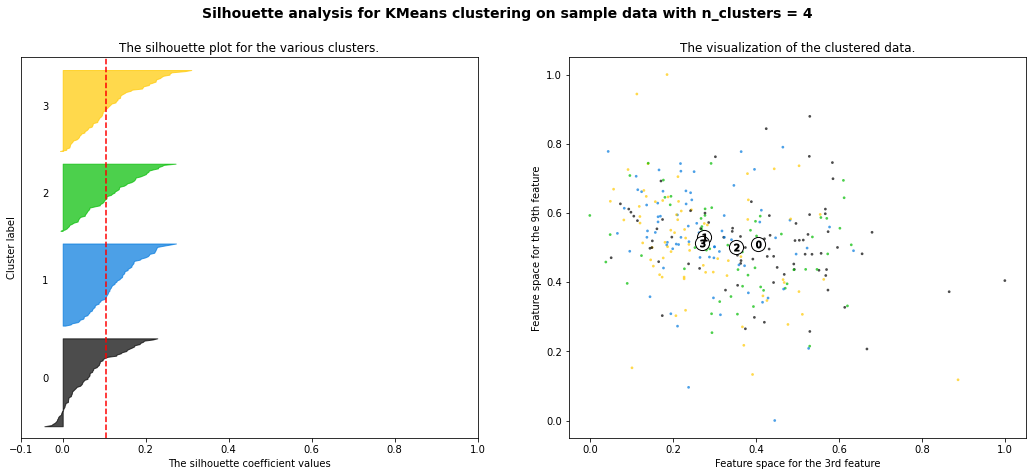

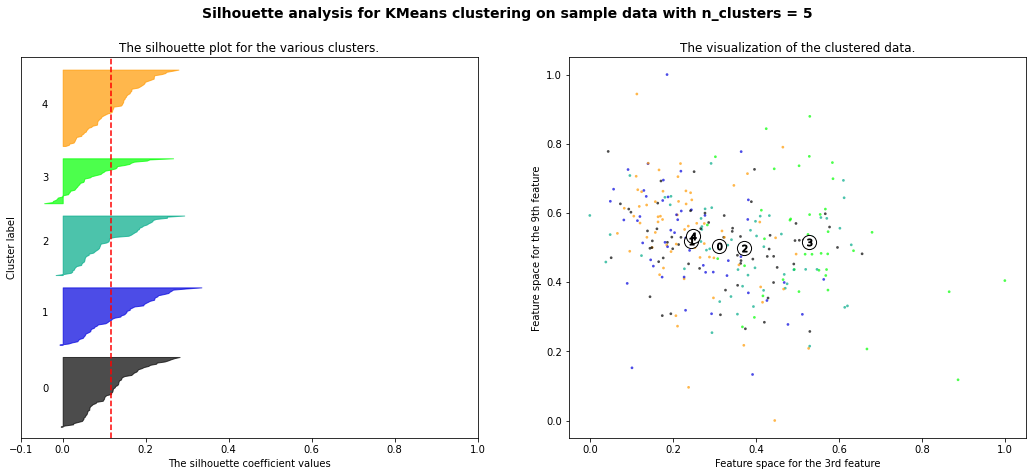

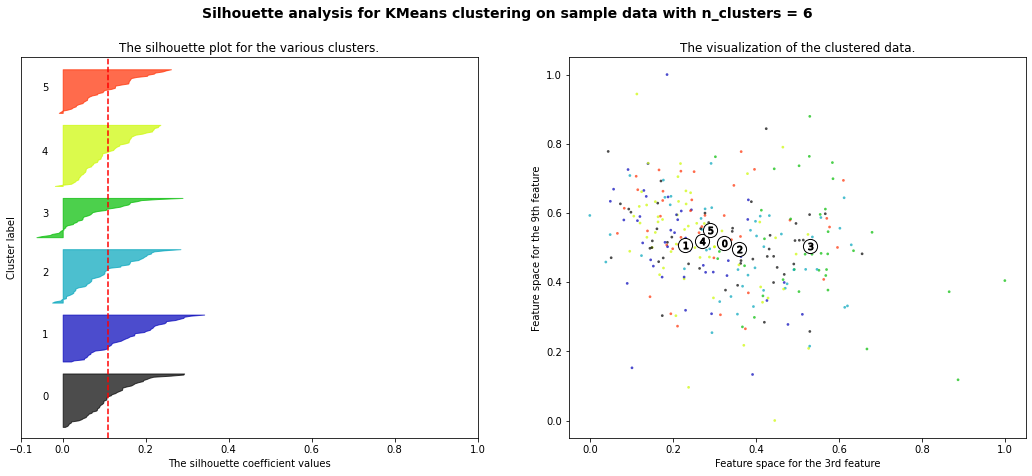

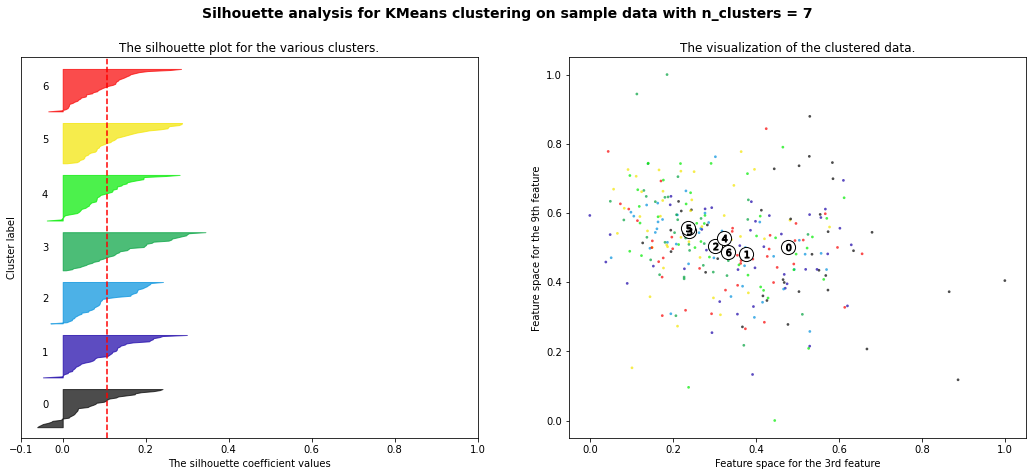

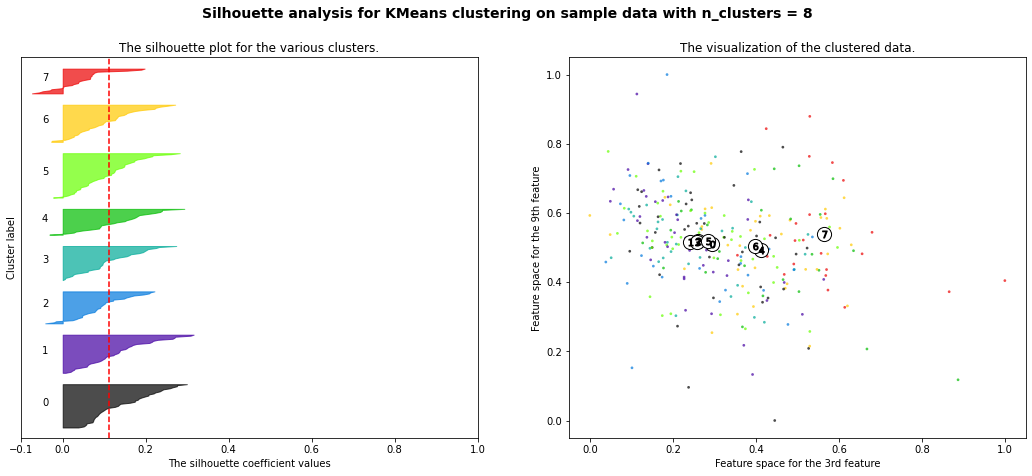

In [0]:
#ref:https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
#ref:https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(xtr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(xtr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(xtr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(xtr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(xtr[:, 0], xtr[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 4], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[4], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

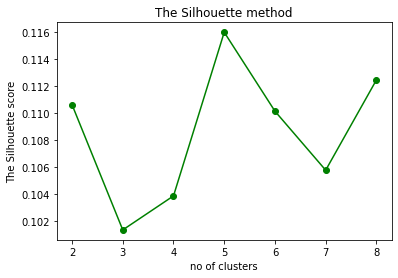

In [0]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()

# K-mean method and save the information

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(xtr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

Label: [136, 143]
Centroids [[0.35289694 0.44251634 0.34956885 0.28827147 0.50730582 0.09864117
  0.57186867 0.49631753 0.50647397 0.74855545 0.55683466 0.50092214]
 [0.30142795 0.40905511 0.31054752 0.25622309 0.52134813 0.06893196
  0.38288859 0.47448669 0.46354657 0.27612141 0.43286629 0.49688925]]


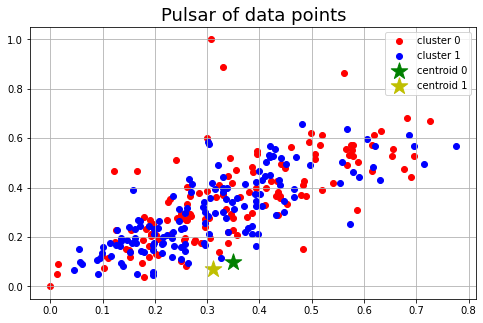

In [0]:
plt.figure(figsize=(8,5))
plt.title("Pulsar of data points", fontsize=18)
plt.grid(True)
plt.scatter(xtr[kmeans.labels_ == 0, 2], xtr[kmeans.labels_ == 0, 0],
            c='red', label='cluster 0')
plt.scatter(xtr[kmeans.labels_ == 1, 2], xtr[kmeans.labels_ == 1, 0],
            c='blue', label='cluster 1')
plt.scatter(centroids[0, 2], centroids[0, 5], marker='*', s=300, c='g', label='centroid 0')
plt.scatter(centroids[1, 2], centroids[1, 5], marker='*', s=300, c='y', label='centroid 1')
plt.legend()
plt.savefig('Pulsar Kmean_10th fold.png', dpi=300)
plt.show()

0 of KFold 10
ROC AUC score: 0.6142857142857143
Confusion matrix
 [[ 8  2]
 [12  9]]
1 of KFold 10
ROC AUC score: 0.5095238095238095
Confusion matrix
 [[ 4  6]
 [ 8 13]]
2 of KFold 10
ROC AUC score: 0.5166666666666666
Confusion matrix
 [[ 7  3]
 [14  7]]
3 of KFold 10
ROC AUC score: 0.5595238095238095
Confusion matrix
 [[ 5  5]
 [ 8 13]]
4 of KFold 10
ROC AUC score: 0.36904761904761907
Confusion matrix
 [[ 5  5]
 [16  5]]
5 of KFold 10
ROC AUC score: 0.41904761904761906
Confusion matrix
 [[ 6  4]
 [16  5]]
6 of KFold 10
ROC AUC score: 0.31666666666666665
Confusion matrix
 [[ 3  7]
 [14  7]]
7 of KFold 10
ROC AUC score: 0.4357142857142857
Confusion matrix
 [[ 3  7]
 [ 9 12]]
8 of KFold 10
ROC AUC score: 0.43333333333333324
Confusion matrix
 [[ 2  8]
 [ 7 14]]
9 of KFold 10


IndexError: ignored

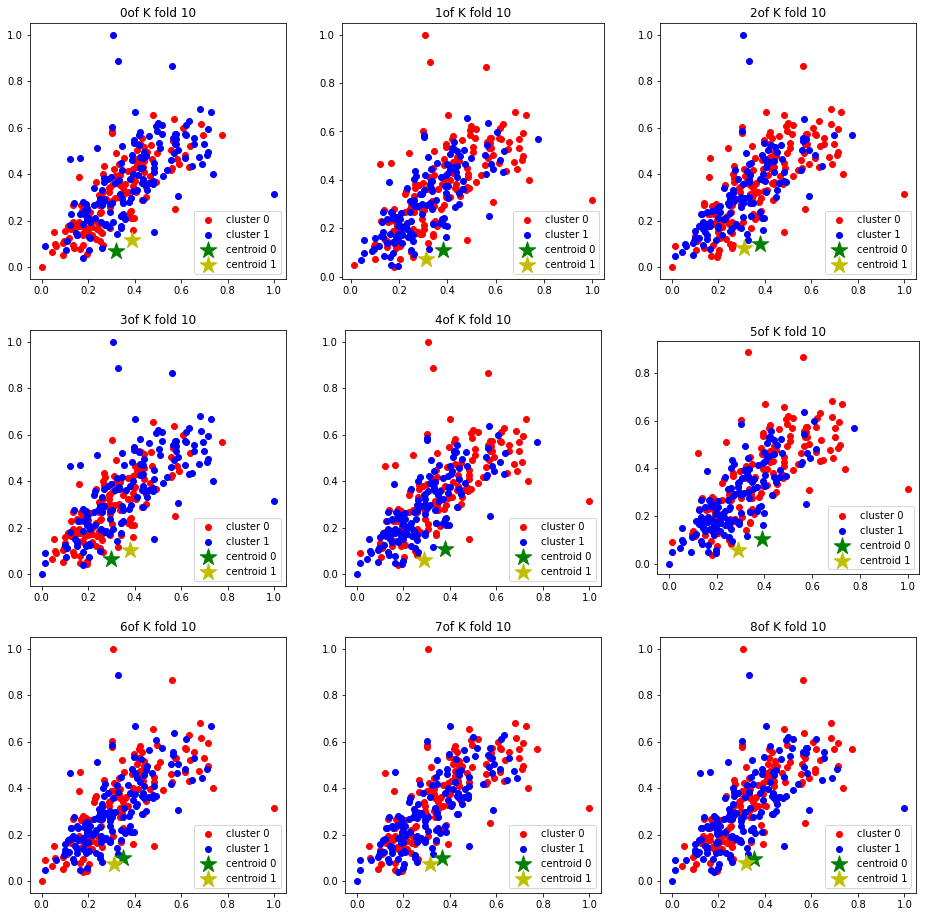

In [0]:
#ref:https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

pred_test_full =0
Label_all = []
centroids_all = []
cv_scoreRF_new =[]
ConfusionMatrix_all = []

i=0

fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in skf.split(spine_X, spine_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = spine_X[train_index],spine_X[test_index]
    ytr,yvl = spine_Y[train_index],spine_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49)
    kmeans.fit(xtr)
    kmLabels = kmeans.labels_
    centers.append(kmLabels)
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    #plt.figure(figsize=(8,5))
    #plt.title("Titanic of data points" "(%d of KFold 10)" %i, fontsize=18)
    #plt.grid(True)
    ax[i].scatter(xtr[kmeans.labels_ == 0, 2], xtr[kmeans.labels_ == 0, 0],
                c='red', label='cluster 0')
    ax[i].scatter(xtr[kmeans.labels_ == 1, 2], xtr[kmeans.labels_ == 1, 0],
                c='blue', label='cluster 1')
    ax[i].scatter(centroids[0, 2], centroids[0, 5], marker='*', s=300, c='g', label='centroid 0')
    ax[i].scatter(centroids[1, 2], centroids[1, 5], marker='*', s=300, c='y', label='centroid 1')
    ax[i].legend()
    ax[i].legend(loc='lower right')
    ax[i].set_title( str(i) +'of K fold 10')
    ax[i].set_aspect('equal')
    #plt.savefig('Pulsar Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    #plt.show()

    ## train and test the dataset in random forest model
    modelRFnew = RandomForestClassifier(random_state=42)
    modelRFnew.fit(xtr,kmLabels)
    scoreRF_new = roc_auc_score(yvl,modelRFnew.predict(xvl))
    print('ROC AUC score:',scoreRF_new)
    cv_scoreRF_new.append(scoreRF_new)
    from sklearn.metrics import confusion_matrix
    ConfusionMatrix = confusion_matrix(yvl, modelRFnew.predict(xvl))
    print('Confusion matrix\n',ConfusionMatrix)
    ConfusionMatrix_all += [ConfusionMatrix]
    i+=1
plt.tight_layout();   

In [1]:
#ref:https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a
from sklearn.model_selection import cross_val_score
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
scores = cross_val_score(model_DT, spine_X, spine_Y, cv=Skf)
scores
print("Mean : %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

NameError: ignored